In [1]:
import pickle as pkl

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from pathlib import Path

In [2]:
data_dir = Path(Path.cwd().parent, Path('data/interim'))

In [3]:
sorted(data_dir.glob('*.pkl'))

[PosixPath('/Users/mhc/MIRI/Q4/TFM/tfm-nlp/data/interim/parsed_emails_chains_all.pkl'),
 PosixPath('/Users/mhc/MIRI/Q4/TFM/tfm-nlp/data/interim/parsed_emails_chains_gt_1.pkl'),
 PosixPath('/Users/mhc/MIRI/Q4/TFM/tfm-nlp/data/interim/parsed_emails_chains_replies.pkl')]

In [4]:
df = pd.read_pickle(Path(data_dir, 'parsed_emails_chains_all.pkl'))

In [5]:
df

,Message,Reply,Chain,Chain_len,Subject,Sender,Recipients,Timestamp
0,The Enron government affairs group has been ac...,False,130993,1,,maureen.mcvicker@enron.com,,315532800
1,Currently an announcement is scheduled for mid...,True,13930,1,Re: Annual Meeting Q&A,steven.kean@enron.com,mary.clark@enron.com,315532800
2,Summary of what we discussed the other night:\...,False,207930,1,california energy prices,steven.kean@enron.com,,315532800
3,- PRINCIPLES 4 with notes.doc\n,False,130994,1,,maureen.mcvicker@enron.com,,315532800
4,Nigeria - Lagos State Project Phase II Signin...,False,15038,1,Archive Log for 7/10/2001 10:54:42 AM,archiving@enron.com,,315532800
...,...,...,...,...,...,...,...,...
251063,\n\nUntitled Document\n\n\n\n\nEducate yoursel...,False,1609,1,(None),pse6yl706@aloha.net,,1716720597
251064,\nHappy New Year !\n - marks.xls,False,213847,1,marks.xls,cramer@cadvision.com,"linsider.jed@enron.com, john.zufferli@enron.co...",2334944052
251065,\nfeb dec trades 37.5 \nfeb dec LL went out 20...,False,218943,1,trades jan 2002,cramer@cadvision.com,john.zufferli@enron.com,2335391160
251066,"\nBOM 5th to 31st traded 34, 33.5 , 33.5 and ...",False,187755,2,Trades,cramer@cadvision.com,john.zufferli@enron.com,2335539586


In [36]:
len(df['Message'])

251068

In [39]:
len(df[['Sender','Recipients']].drop_duplicates())

119647

In [41]:
len(df['Sender'].unique())

19993

In [16]:
df['Chain'].value_counts().reset_index(drop=True)

131203    798
126965    290
122336    233
122191    123
130942    122
         ... 
119978      1
33353       1
34006       1
33350       1
218948      1
Name: Chain, Length: 220309, dtype: int64

In [45]:
df['Chain_len'].mean()

5.0636002995204485

In [59]:
X1.mean()

12.557795228329915

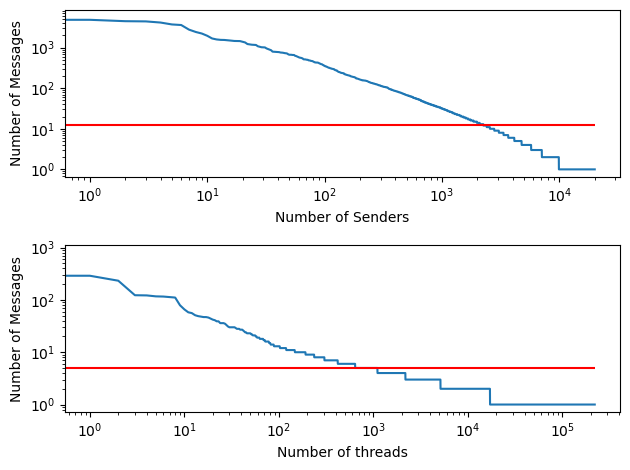

In [8]:
X1 = df['Sender'].value_counts().reset_index(drop=True)
X2 = df['Chain'].value_counts().reset_index(drop=True)

fig, (ax1, ax2) = plt.subplots(2, 1)

ax1.loglog(X1)
ax1.hlines(X1.mean(),0,len(X1), color='red')
ax1.set_xlabel('Number of Senders')
ax1.set_ylabel('Number of Messages')

ax2.loglog(X2)
ax2.hlines(df['Chain_len'].mean(),0,len(X2), color='red')
ax2.set_xlabel('Number of threads')
ax2.set_ylabel('Number of Messages')

fig.tight_layout()
plt.savefig(Path('../img','senders_and_threads.png'),format='png')
plt.show()